In [1]:
"""Shahareyar Hossain
-----------------------------------------------------------------------------
MNIST digit data reading helper
-----------------------------------------------------------------------------
AUTHOR: Soumitra Samanta (soumitra.samanta@gm.rkmvu.ac.in)
-----------------------------------------------------------------------------
"""

import gzip
import numpy as np
import matplotlib.pyplot as plt
import numpy  as np
import random

import pandas as pd


# Read MNIST data:
There are many [ways](https://stackoverflow.com/questions/40427435/extract-images-from-idx3-ubyte-file-or-gzip-via-python) you can read the MNIST data. Here is a [way](https://stackoverflow.com/a/62781370) to read all the information.

Train data (X) size: (60000, 28, 28), and labels (Y) size: (60000,)
Test data (X) size: (10000, 28, 28), and labels (Y) size: (10000,)


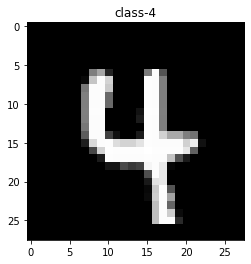

Train image 30327-th sample 
[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0 126 165  36   0   0   0   0 123 253  83
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   8 197 252 211   0   0   0   0 253 252 126
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0 119 2

In [2]:
def read_images(filename):
    """Read MNIST images"""
    
    with gzip.open(filename, 'r') as f:
        # first 4 bytes is a magic number
        magic_number = int.from_bytes(f.read(4), 'big')
        # second 4 bytes is the number of images
        image_count = int.from_bytes(f.read(4), 'big')
        # third 4 bytes is the row count
        row_count = int.from_bytes(f.read(4), 'big')
        # fourth 4 bytes is the column count
        column_count = int.from_bytes(f.read(4), 'big')
        # rest is the image pixel data, each pixel is stored as an unsigned byte
        # pixel values are 0 to 255
        image_data = f.read()
        images = np.frombuffer(image_data, dtype=np.uint8).reshape((image_count, row_count, column_count))
        
    return images

def read_labels(filename):
    """Read MNIST labels"""
    
    with gzip.open(filename, 'r') as f:
        # first 4 bytes is a magic number
        magic_number = int.from_bytes(f.read(4), 'big')
        # second 4 bytes is the number of labels
        label_count = int.from_bytes(f.read(4), 'big')
        # rest is the label data, each label is stored as unsigned byte
        # label values are 0 to 9
        label_data = f.read()
        labels = np.frombuffer(label_data, dtype=np.uint8)
        
    return labels


#dataset_path = r"C:/Users/Lenovo User/Documents/Machine_Learning/assignment_1/"

#train_image_filename = ''.join([dataset_path, 'train-images-idx3-ubyte.gz'])
#train_label_filename = ''.join([dataset_path, 'train-labels-idx1-ubyte.gz'])

#test_image_filename = ''.join([dataset_path, 't10k-images-idx3-ubyte.gz'])
#test_label_filename = ''.join([dataset_path, 't10k-labels-idx1-ubyte.gz'])

train_images = read_images("train-images-idx3-ubyte.gz")
train_labels = read_labels("train-labels-idx1-ubyte.gz")
print('Train data (X) size: {}, and labels (Y) size: {}' .format(train_images.shape, train_labels.shape))

test_images = read_images("t10k-images-idx3-ubyte.gz")
test_labels = read_labels("t10k-labels-idx1-ubyte.gz")
print('Test data (X) size: {}, and labels (Y) size: {}' .format(test_images.shape, test_labels.shape))

rand_ids = np.random.choice(train_images.shape[0])
plt.imshow(train_images[rand_ids, :, :], cmap='gray')
plt.title('class-'+str(train_labels[rand_ids]))
plt.show()

print('Train image {}-th sample ' .format(rand_ids))
print(train_images[rand_ids, :, :])



# Extract 20% data from thhe training data as a validation set. <font color='red'>Please do not use some standard function from scikit-learn or others!</font>

In [23]:
# Your validation set extraction script/code 

train_flat = np.array(train_images.reshape(60000, 28*28), dtype = np.float64) # CONVERTING IN DESIRED FORM
#train_flat
np.random.seed(69)
ran = np.random.choice(range(60000), 60000, replace = False) # GENERATING RANDOM INDICES FOR SHUFFLING
#ran
train_df = train_flat[ran] # SHUFFLING USING RANDOM INDICES : FANCY INDEXING
#train_df.dtype='float32'
val_img = train_df[:12000] # EXTRACTING VALIDATING SET OF IMAGES
#val_img
train_img = train_df[12000:] # EXTRACTING TRAINING SET OF IMAGES
#train_img
ran_labels = train_labels[ran]
#ran_labels
val_lab = ran_labels[:12000]
#val_lab
train_lab = ran_labels[12000:]
#train_lab
test_img = np.array(test_images.reshape(10000, 28*28), dtype = np.float64)
#test_img.dtype='float32'
print(test_img.dtype)
print(val_img.shape)

float64
(12000, 784)


# Implement k-NN classification rule/algorithm, we have discussed in our class. <font color='red'>Please do not use some standard function from scikit-learn or others!</font>

In [17]:
# Distance functions

def euclidean_distance(arr):
#     return np.sqrt(np.sum((train_img - arr)**2, axis = 1))
    return np.linalg.norm(train_img - arr, axis = 1)

def manhattan_distance(arr):
    return np.sum(np.abs(train_img - arr), axis = 1)

def cheb_distance(arr):
    return np.max(np.abs(train_img - arr), axis = 1)

def accuracy(a, b):
    c = np.array(a) == np.array(b)
    return np.sum(c)/len(a)

#==============================================================================================================================
# Prediction

def predictions(data, fun):
    record = {}

    for k in range(1, 26, 2):
        record[k] = []

    for x in data:
        tem = fun(x)
        tem_df = pd.DataFrame(tem)
        tem_df["label"] = train_lab
        tem_sort = tem_df.sort_values(by = [0])
        for k in range(1, 26, 2):
            tem_k = tem_sort.iloc[0:k]
            y = tem_k.value_counts("label").index[0]
            record[k].append(y)
    print("Col indexes are values of k, values along col are predictions")
    return pd.DataFrame(record)

#===============================================================================================================================

def prediction_k(data, fun, k):
    record = []
    for x in data :
        tem = fun(x)
        tem_df = pd.DataFrame(tem)
        tem_df['label'] = train_lab
        tem_sort = tem_df.sort_values(by = [0])
        tem_k = tem_sort.iloc[0:k]
        y = tem_k.value_counts('label').index[0]
        record.append(y)
    return record

Col indexes are values of k, values along col are predictions
       1   3   5   7   9   11  13  15  17  19  21  23  25
0       1   1   1   1   1   1   1   1   1   1   1   1   1
1       6   6   6   6   6   6   6   6   6   6   6   6   6
2       9   9   9   9   9   9   9   9   9   9   9   9   9
3       6   6   6   6   6   6   6   6   6   6   6   6   6
4       6   6   6   6   6   6   6   6   6   6   6   6   6
...    ..  ..  ..  ..  ..  ..  ..  ..  ..  ..  ..  ..  ..
11995   0   0   0   0   0   0   0   0   0   0   0   0   0
11996   6   6   6   6   6   6   6   6   6   6   6   6   6
11997   8   8   8   8   8   8   8   8   8   8   8   8   8
11998   1   1   1   1   1   1   1   1   1   1   1   1   1
11999   4   4   4   4   4   4   4   4   4   4   4   4   4

[12000 rows x 13 columns]
CPU times: user 17min 43s, sys: 14min, total: 31min 43s
Wall time: 31min 54s


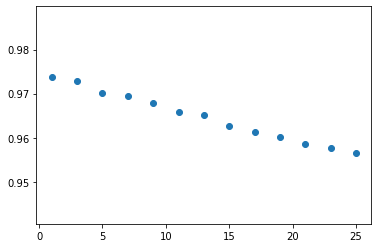

In [5]:
# EUCLIDEAN DISTANCE

%%time
eu = predictions(val_img, euclidean_distance)
print(eu)
acc_eu = eu.apply(accuracy, b = val_lab).sort_values(ascending=False)
acc_eu
# Highest k
eu_k = acc_eu.index[0]; eu_k
# Highest Accuracy
eu_val = acc_eu.values[0]; eu_val
plt.scatter(acc_eu.index, acc_eu.values) 


In [13]:
print(eu_k);
print(eu_val);

1
0.97375


Col indexes are values of k, values along col are predictions
CPU times: user 17min 46s, sys: 14min 4s, total: 31min 50s
Wall time: 32min 1s


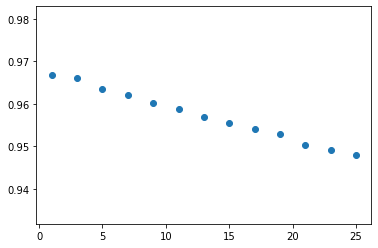

In [6]:
# MANHATTAN

%%time
man = predictions(val_img, manhattan_distance)
acc_man = man.apply(accuracy, b = val_lab).sort_values(ascending=False)
acc_man
# Highest k
man_k = acc_man.index[0]; man_k
# Highest Accuracy
man_val = acc_man.values[0]; man_val
plt.scatter(acc_man.index, acc_man.values)

In [15]:
print(man_k);
print(man_val);

1
0.9668333333333333


Col indexes are values of k, values along col are predictions
CPU times: user 17min 45s, sys: 14min 6s, total: 31min 52s
Wall time: 32min 2s


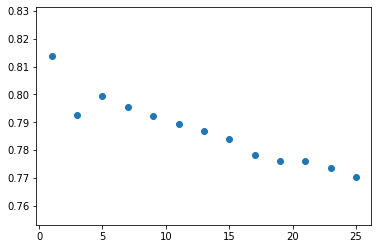

In [7]:
# CHEBYCHEV

%%time
cheb = predictions(val_img, cheb_distance)
acc_cheb = cheb.apply(accuracy, b = val_lab).sort_values(ascending=False)
acc_cheb
# Highest k
cheb_k = acc_cheb.index[0]; cheb_k
# Highest Accuracy
cheb_val = acc_cheb.values[0]; cheb_val
plt.scatter(acc_cheb.index, acc_cheb.values)

In [16]:
print(cheb_val)
print(cheb_k)

0.8139166666666666
1


In [24]:
# TESTING
# FOR EUCLIDEAN WE GET MAX ACCURACY CORRESPONDING TO K = 1

eu_test = prediction_k(test_img, euclidean_distance, 1)

In [29]:
eu_acc = accuracy(eu_test, test_labels)
print(eu_acc)

0.9672


In [30]:
# Testing
# For Manhattan we get max accuracy corresponding to k = 1

man_test = prediction_k(test_img, manhattan_distance, 1)
man_acc = accuracy(man_test, test_labels)
print(man_acc)

0.9604


In [31]:
# Testing
# For Chebyshev we get max accuracy corresponding to k = 1

cheb_test = prediction_k(test_img, cheb_distance, 1)
cheb_acc = accuracy(cheb_test, test_labels)
print(cheb_acc)

0.8098


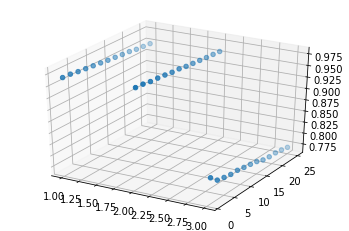

In [44]:
# p-value VS k-value VS Accuracy

from mpl_toolkits import mplot3d

fig = plt.figure()

ax = plt.axes(projection = '3d')


x = ([1]*13)+([2]*13)+([3]*13)
y = [x for x in range(1,26,2)]*3

z = []
z.extend(acc_man.values)
z.extend(acc_eu.values)
z.extend(acc_cheb.values)

ax.scatter(x,y,z, 'green')
#ax.view_init(-140,60)

In [95]:
# Confusion Matrix for Euclidean

con_euc_mat = np.array(np.zeros(100),dtype= np.int32).reshape(10,10)
for i,j in zip(test_labels, eu_test):
    con_euc_mat[i,j] += 1
con_euc_mat_df = pd.DataFrame(con_euc_mat)
print(con_euc_mat_df);

# Accuracy

print(np.trace(con_euc_mat_df)/10000)


     0     1    2    3    4    5    6    7    8    9
0  972     1    1    0    0    1    4    1    0    0
1    0  1130    2    0    1    1    1    0    0    0
2    7     7  988    6    1    0    3   17    3    0
3    0     1    2  971    1   16    0    8    8    3
4    2     8    0    0  940    0    2    5    1   24
5    3     1    0   11    2  860    6    1    5    3
6    3     3    0    0    3    5  944    0    0    0
7    0    14    5    2    4    0    0  993    0   10
8    5     1    4   15    6   17    3    4  912    7
9    2     6    1    6   10    4    1   14    3  962
0.9672


In [97]:
# Confusion Matrix for Manhattan

con_manhatt_mat = np.array(np.zeros(100),dtype= np.int32).reshape(10,10)
for i,j in zip(test_labels, man_test):
    con_manhatt_mat[i,j] += 1
con_manhatt_mat_df = pd.DataFrame(con_manhatt_mat)
print(con_manhatt_mat_df)

# Accuracy

print(np.trace(con_manhatt_mat_df)/10000)

     0     1    2    3    4    5    6    7    8    9
0  972     2    1    0    0    1    3    1    0    0
1    0  1130    2    0    1    1    1    0    0    0
2    9     9  984    6    1    0    3   18    2    0
3    0     3    4  966    1   18    0    9    5    4
4    2    10    0    0  937    0    3    5    1   24
5    3     2    0   17    3  846   10    1    4    6
6    4     3    0    0    3    6  942    0    0    0
7    0    20    4    2    5    0    0  986    0   11
8   10     6    7   22    5   21    4    4  885   10
9    1     7    1    7   14    4    1   15    3  956
0.9604


In [98]:
# Confusion Matrix for Chebyshebs

con_cheb_mat = np.array(np.zeros(100),dtype= np.int32).reshape(10,10)
for i,j in zip(test_labels, cheb_test):
    con_cheb_mat[i,j] += 1
con_cheb_mat_df = pd.DataFrame(con_cheb_mat)
print(con_cheb_mat_df)

# Accuracy

print(np.trace(con_cheb_mat_df)/10000)

     0     1    2    3    4    5    6    7    8    9
0  918     2   13    7    4    8    7    5   10    6
1    2  1116    1    1    0    0    2    0   13    0
2   63    21  703   62   14   17   49   17   76   10
3   35    11   35  704    2   49   17   20  127   10
4   35     7   19    9  745    6   17   18   67   59
5   61     9   20   56   16  554   22   16  118   20
6   45     6   11    7    7    9  845    6   19    3
7   14    11   15   10   12    6    5  873   48   34
8   31    14   23   47    9   30   13   14  771   22
9   18     7    4   12   13    8    6   23   49  869
0.8098
